# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df


,reviews
0,"✅ Trip Verified | We flew in November 2023, ..."
1,✅ Trip Verified | I left for London from Johan...
2,✅ Trip Verified | After an excellent flight ...
3,✅ Trip Verified | On a recent flight from Cy...
4,✅ Trip Verified | Flight BA 0560 arrived in ...
...,...
995,Not Verified | Inflight crew were very helpfu...
996,✅ Trip Verified | From Toronto to Pisa British...
997,✅ Trip Verified | A very good service on board...
998,✅ Trip Verified | This was the worst experienc...


In [4]:
df.to_csv(r"C:\Users\vaibhav gupta\Downloads\BA_reviews.csv")


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import re

# Assuming df['reviews'] contains the review text
df['cleaned_reviews'] = df['reviews'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))

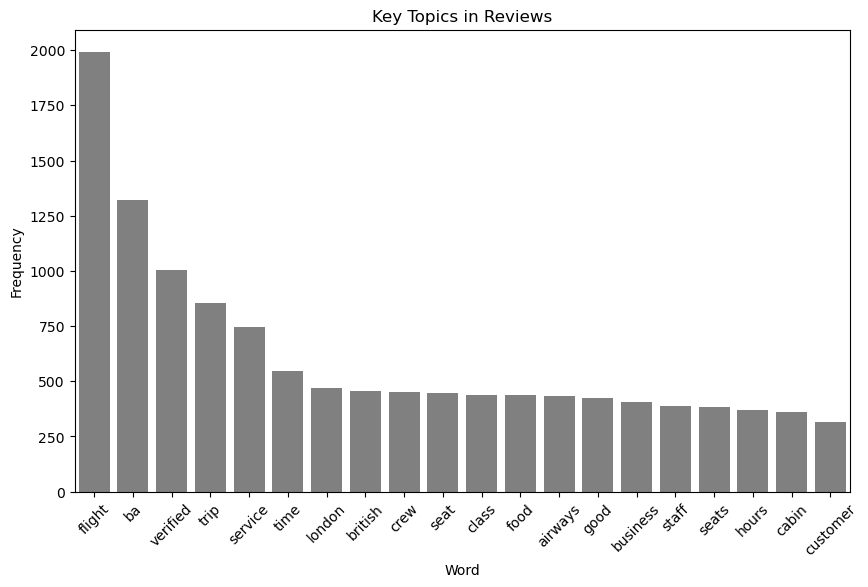

In [6]:
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['cleaned_reviews'])

# Summing up the frequencies of each word
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# Convert to DataFrame for plotting
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot the bar chart for key topics
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=word_freq_df, color='gray')
plt.title("Key Topics in Reviews")
plt.xticks(rotation=45)
plt.show()

In [7]:
from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)

# Count sentiment distribution
sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100

# Print sentiment counts
print(sentiment_counts)

sentiment
positive    61.5
negative    37.3
neutral      1.2
Name: proportion, dtype: float64


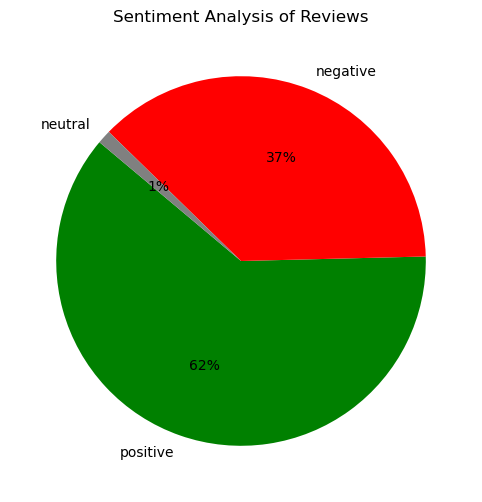

In [8]:
# Sentiment Pie Chart
colors = ['green', 'red', 'gray']
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.0f%%', colors=colors, startangle=140)
plt.title("Sentiment Analysis of Reviews")
plt.show()

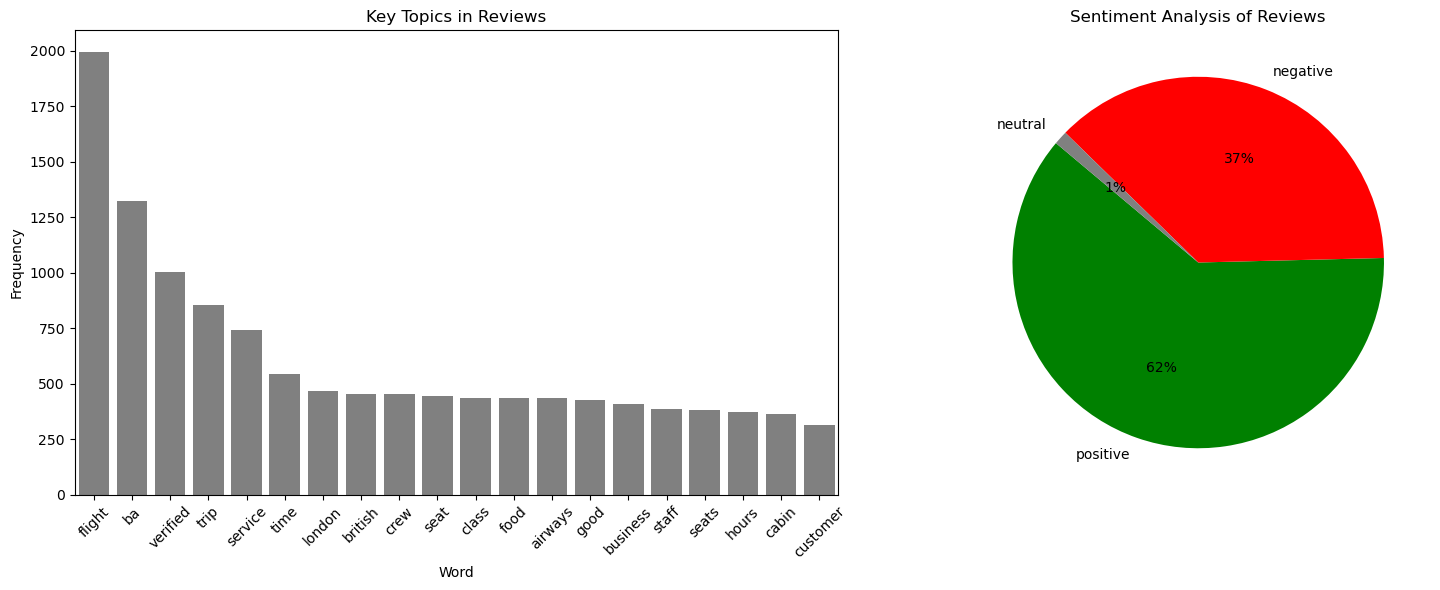

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Key Topics (Bar Chart)
sns.barplot(x='Word', y='Frequency', data=word_freq_df, ax=axes[0], color='gray')
axes[0].set_title("Key Topics in Reviews")
axes[0].tick_params(axis='x', rotation=45)

# Sentiment Analysis (Pie Chart)
axes[1].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.0f%%', colors=colors, startangle=140)
axes[1].set_title("Sentiment Analysis of Reviews")

plt.tight_layout()
plt.show()